In [41]:
import os
from glob import glob

import pairwise_fte
from py_utils import data_ops
import evaluate_fte
from lib import app
from py_utils import log

%load_ext autoreload
%autoreload 2

%matplotlib inline

# root_dir = os.path.join("..", "data")
root_dir = os.path.join("/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos")
# If you are running the code remotely on the Linux i9.
# root_dir = os.path.join("/","data", "dlc", "to_analyse", "cheetah_videos")\
logger = log.logger("main")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = pairwise_fte.create_pose_functions(root_dir)

In [46]:
# Configurations for the optimisation. 2017_08_29/top/phantom/run1_1 2017_08_29/top/phantom/flick1_1
data_path = os.path.join("2017_12_16", "top", "phantom", "flick1")
start_frame = 1
end_frame = 110
dlc_thresh = 0.1

In [48]:
# Run the optimisation
pairwise_fte.run(root_dir, data_path, start_frame, end_frame, dlc_thresh, generate_reprojection_videos=True, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

2021-06-03T13:26:24.115 | INFO | pairwise_fte: Prepare data - Start


Loaded extrinsics from /Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_12_16/top/extrinsic_calib/6_cam_scene_sba.json



2021-06-03T13:26:25.346 | INFO | pairwise_fte: Load H5 2D DLC prediction data


Found 4756 pairwise points between camera 0 and 1
Found 4743 pairwise points between camera 1 and 2
Found 3802 pairwise points between camera 2 and 3
Found 3615 pairwise points between camera 3 and 4
Found 3522 pairwise points between camera 4 and 5
Found 4952 pairwise points between camera 5 and 0


2021-06-03T13:26:26.022 | INFO | pairwise_fte: Estimate the initial trajectory


2021-06-03T13:26:27.010 | INFO | pairwise_fte: Prepare data - End
2021-06-03T13:26:27.014 | INFO | pairwise_fte: Start frame: 0, End frame: 110, Frame rate: 90
2021-06-03T13:26:27.018 | INFO | pairwise_fte: Setup optimisation - Start
2021-06-03T13:26:27.518 | INFO | pairwise_fte: Measurement initialisation...Done
2021-06-03T13:26:30.385 | INFO | pairwise_fte: Variable initialisation...Done
2021-06-03T13:26:54.155 | INFO | pairwise_fte: Constaint initialisation...Done
2021-06-03T13:26:54.919 | INFO | pairwise_fte: Objective initialisation...Done
2021-06-03T13:26:54.922 | INFO | pairwise_fte: Setup optimisation - End
2021-06-03T13:26:54.925 | INFO | pairwise_fte: Initialisation took 30.81s


Ipopt 3.13.3: print_level=5
max_iter=1000
max_cpu_time=10000
Tol=0.1
linear_solver=ma86
option_file_name=/var/folders/_2/61j71l3s06zfdc543275_g8w0000gn/T/tmpgsyvj7u0_ipopt.opt

Using option file "/var/folders/_2/61j71l3s06zfdc543275_g8w0000gn/T/tmpgsyvj7u0_ipopt.opt".


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver ma86.

Number of nonzeros in equality constraint Jacobian...:   217505
Number of nonzeros in inequality constraint Jacobian.:      220
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:    52780
                     v

2021-06-03T13:33:04.159 | INFO | pairwise_fte: Optimisation solver took 369.23s
2021-06-03T13:33:04.163 | INFO | pairwise_fte: Generate outputs...


Saved /Users/zico/msc/dev/AcinoSet/data/2017_12_16/top/phantom/flick1/fte_pw/fte.pickle
Saved /Users/zico/msc/dev/AcinoSet/data/2017_12_16/top/phantom/flick1/fte_pw/cam*_fte.h5
Saved /Users/zico/msc/dev/AcinoSet/data/2017_12_16/top/phantom/flick1/fte_pw/cam*_fte.csv

Saving labeled videos...
Loading cam1 and data.
Loading cam2 and data.
Loading cam3 and data.
Loading cam4 and data.Loading cam5 and data.
Loading cam6 and data.


Duration of video: 3.23 s, recorded with 90.0 fps!
Total frames: 291 with frame dimensions: 1920 x 1080

Duration of video: 3.23 s, recorded with 90.0 fps!Generating frames and creating video...

Total frames: 291 with frame dimensions: 1920 x 1080
Duration of video: 3.23 s, recorded with 90.0 fps!
Duration of video: 3.23 s, recorded with 90.0 fps!
Duration of video: 3.23 s, recorded with 90.0 fps!


Total frames: 291 with frame dimensions: 1920 x 1080


  0%|          | 0/291 [00:00<?, ? f/s]

Generating frames and creating video...
Duration of video: 3.23 s, recorded with 90.0 fps!
Total frames: 291 with frame dimensions: 1920 x 1080
Total frames: 291 with frame dimensions: 1920 x 1080Generating frames and creating video...



Generating frames and creating video...Total frames: 291 with frame dimensions: 1920 x 1080Generating frames and creating video...


  0%|          | 0/291 [00:00<?, ? f/s]



Generating frames and creating video...

  0%|          | 0/291 [00:00<?, ? f/s]

100%|██████████| 291/291 [00:51<00:00,  5.67 f/s]
2021-06-03T13:33:59.303 | INFO | pairwise_fte: Done


Done!



In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
# orig_file = os.path.join(root_dir, data_path, "fte", "fte.pickle")
pw_file = os.path.join(root_dir, data_path, "fte_pw", "fte.pickle")
pairwise_fte.plot_cheetah(pw_file)
# pairwise_fte.compare(orig_file, pw_file)

In [ ]:
# DEBUB purposes - if you want to display particular frames to inspect the measurements that are incorporated in the optimisation process.
# The camera to use.
cam_num = 1
# The measurements to display 1 - base prediction, 2 - 3 pairwise measurements. Max is 3.
pw_values = (1, 2, 3)
# Frame number to display.
frame_num = 110
pairwise_fte.display_test_image(data_dir, cam_num, pw_values, frame_num)

In [ ]:
eval_dir = os.path.join("/Users/zico/msc/dev/AcinoSet/data", data_path, "fte_pw")
data = data_ops.load_pickle(os.path.join(eval_dir, "fte.pickle"))
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(eval_dir, exist_ok=True)
max_delta_acc = evaluate_fte.eval_delta_acc(data, results_dir)
evaluate_fte.eval_model_error(data, results_dir)
evaluate_fte.eval_meas_error(data, results_dir)
Q = [ # model parameters variance
        max_delta_acc[0], max_delta_acc[1], max_delta_acc[2], # x, y, z
        max_delta_acc[3], max_delta_acc[6], 0, max_delta_acc[10], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, #  phi_1, ... , phi_14
        max_delta_acc[4], max_delta_acc[7], max_delta_acc[9], max_delta_acc[11], max_delta_acc[13], max_delta_acc[15], max_delta_acc[17], max_delta_acc[18], max_delta_acc[19], max_delta_acc[20], max_delta_acc[21], max_delta_acc[22], max_delta_acc[23], max_delta_acc[24], # theta_1, ... , theta_n
        max_delta_acc[5], max_delta_acc[8], 0, max_delta_acc[12], max_delta_acc[14], max_delta_acc[16], 0, 0, 0, 0, 0, 0, 0, 0, # psi_1, ... , psi_n
    #     ?, ?, ? # lure's x, y, z variance
    ]
logger.info(Q)

In [ ]:
fig_fpath = os.path.join(os.path.join(os.path.join("..", "data"), data_path, "fte_pw"), 'fte.svg')
pw_file = data_ops.load_pickle(os.path.join(os.path.join("..", "data"), data_path, "fte_pw", "fte.pickle"))
app.plot_cheetah_states(pw_file["x"], out_fpath=fig_fpath)

/Users/zico/opt/anaconda3/envs/pypy/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


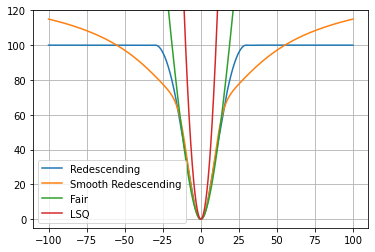

In [20]:
pairwise_fte.plot_cost_functions()